# E-commerce Business Operation Analysis

In [94]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname=r"C:\Users\zhoux\Downloads\data\STSONG.TTF")


In [95]:
df = pd.read_excel(r"C:\Users\zhoux\Downloads\data\E-Business.xlsx")
df.head()

,行 ID,订单 ID,订单日期,发货日期,邮寄方式,客户 ID,客户名称,细分,城市,省/自治区,国家,地区,产品 ID,类别,子类别,产品名称,销售额,数量,折扣,利润
0,1,US-2019-1357144,2019-04-27,2019-04-29,二级,曾惠-14485,曾惠,公司,杭州,浙江,中国,华东,办公用-用品-10002717,办公用品,用品,"Fiskars 剪刀, 蓝色",163.696,10,0.37,-60.704
1,2,CN-2019-1973789,2019-06-15,2019-06-19,标准级,许安-10165,许安,消费者,内江,四川,中国,西南,办公用-信封-10004832,办公用品,信封,"GlobeWeis 搭扣信封, 红色",159.440,10,0.00,42.560
2,3,CN-2019-1973789,2019-06-15,2019-06-19,标准级,许安-10165,许安,消费者,内江,四川,中国,西南,办公用-装订-10001505,办公用品,装订机,"Cardinal 孔加固材料, 回收",65.920,10,0.37,4.200
3,5,CN-2018-2975416,2018-05-31,2018-06-02,二级,万兰-15730,万兰,消费者,汕头,广东,中国,中南,办公用-器具-10003452,办公用品,器具,"KitchenAid 搅拌机, 黑色",1409.920,11,0.00,550.200
4,6,CN-2017-4497736,2017-10-27,2017-10-31,标准级,俞明-18325,俞明,消费者,景德镇,江西,中国,华东,技术-设备-10001640,技术,设备,"柯尼卡 打印机, 红色",11163.580,17,0.00,3783.780


In [96]:
df.shape

(9268, 20)

### 年销售量增长趋势

In [97]:
sales_year = df.groupby('订单日期').sum()
sales2016 = sales_year['2016'].sum()['销售额']
sales2017 = sales_year['2017'].sum()['销售额']
sales2018 = sales_year['2018'].sum()['销售额']
sales2019 = sales_year['2019'].sum()['销售额']

sales_list = [sales2016,sales2017,sales2018,sales2019]
sales_list

[2990794.4150000024, 3505733.4629999995, 4333775.860000002, 4540400.743999999]

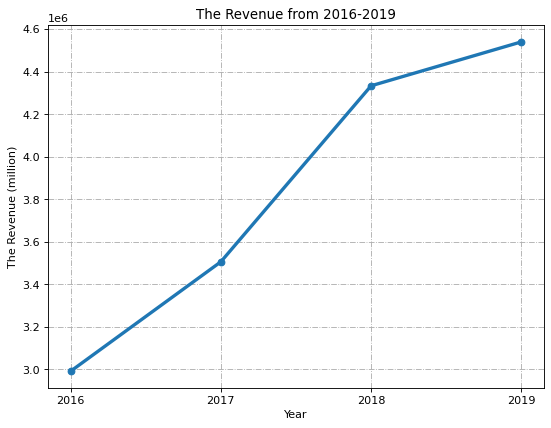

In [98]:
plt.figure(figsize = (8,6), dpi= 80)
plt.plot(['2016','2017','2018','2019'],sales_list,linewidth = 3, marker = 'o')
plt.title('The Revenue from 2016-2019')
plt.xlabel('Year')
plt.ylabel('The Revenue (million)')
plt.grid('darkgray', linestyle = '-.')
plt.show()

### 各省市销量，销售额，利润

In [99]:
region = df.groupby('省/自治区').sum()
region

,行 ID,销售额,数量,折扣,利润
省/自治区,,,,,
上海,1331714,559833.728,3262,1.85,118028.148
云南,659706,335588.224,1842,2.34,76789.104
内蒙古,1005965,267942.604,2531,62.80,-56557.256
北京,1170343,395670.420,2689,0.00,86252.460
吉林,1746221,640075.136,3896,5.15,150089.016
四川,1818338,389887.408,4332,113.03,-87288.852
天津,1554166,524898.590,3402,1.50,106867.670
宁夏,218516,59157.800,420,0.74,8442.700
安徽,1635063,585681.510,3712,5.10,132539.470


### 区域销售业绩

In [100]:
sales = region['销售额'].sort_values(ascending = False)
print(sales)

省/自治区
山东     1536900.848
广东     1415184.843
黑龙江    1107405.099
河南      836359.079
辽宁      809522.760
河北      777592.905
湖南      701140.413
吉林      640075.136
江苏      628428.664
安徽      585681.510
湖北      585251.552
上海      559833.728
天津      524898.590
福建      520496.472
陕西      428424.268
山西      413351.650
浙江      407934.916
北京      395670.420
四川      389887.408
广西      350846.886
云南      335588.224
重庆      331574.872
内蒙古     267942.604
江西      221274.880
海南      172792.843
甘肃      163956.732
贵州      108829.920
宁夏       59157.800
青海       45536.700
新疆       44556.440
西藏        4606.320
Name: 销售额, dtype: float64


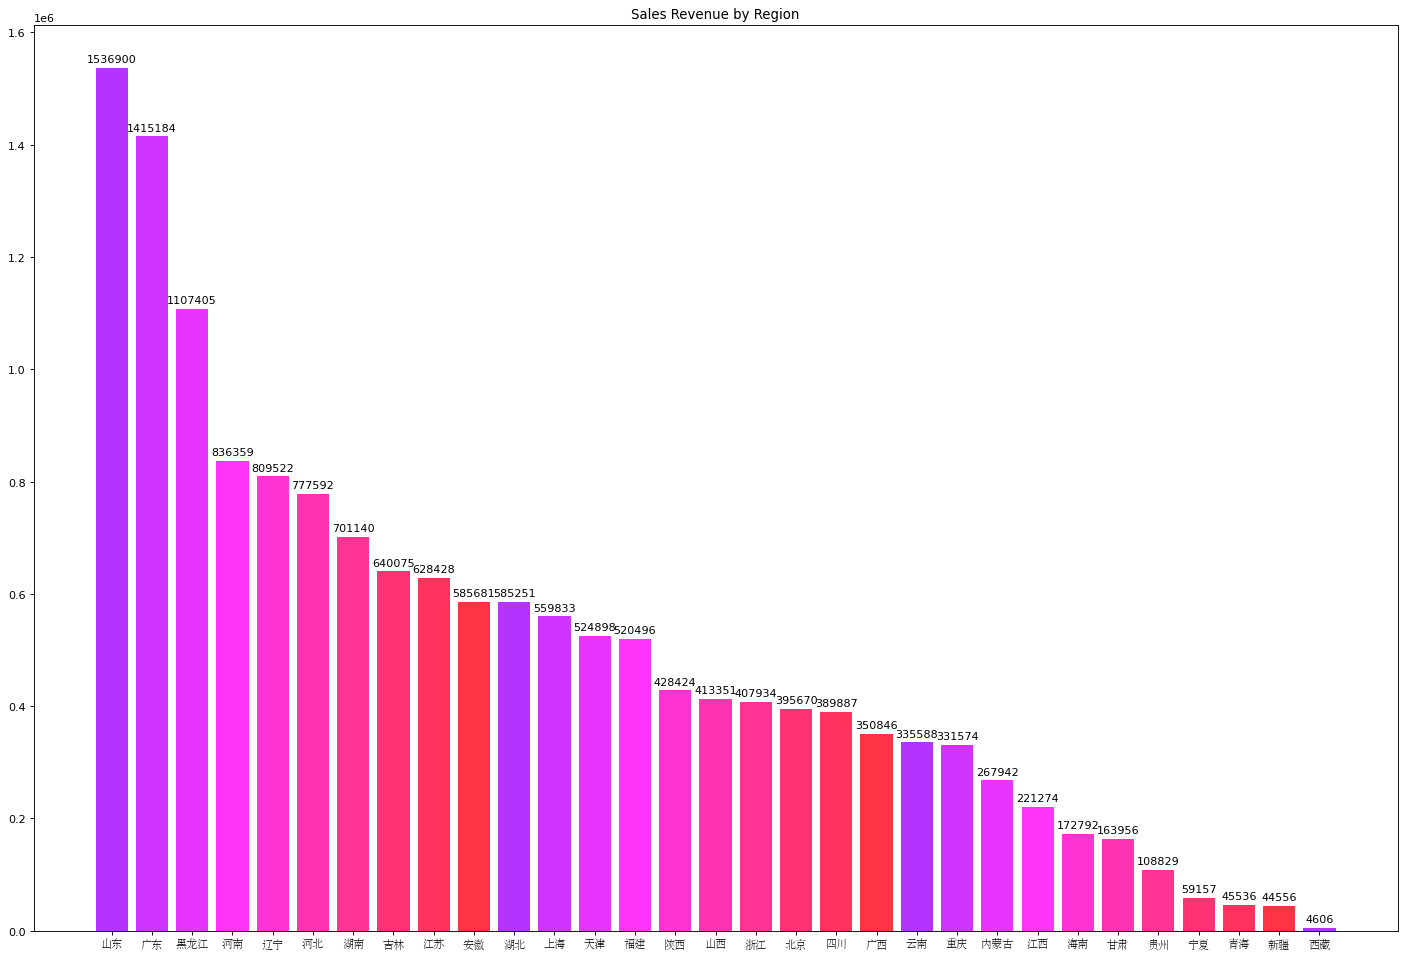

In [101]:
my_font = font_manager.FontProperties(fname=r"C:\Users\zhoux\Downloads\data\STSONG.TTF")
plt.figure(figsize = (22,15),dpi = 80)
rects = plt.bar(sales.index, sales, color = ['#B533FF','#D133FF','#E933FF','#FF33F9','#FF33D4','#FF33B2','#FF3393','#FF3374','#FF335E','#FF3346'])

for rect in rects:
    plt.text(rect.get_x()+rect.get_width()/2, rect.get_height()+10000, str(int(rect.get_height())), ha = 'center')

plt.xticks(sales.index, fontproperties = my_font)
plt.title('Sales Revenue by Region')

plt.show()

### 各区域利润, Last 10 及占比

In [102]:
pros = region['利润'].sort_values(ascending = False)
pros

省/自治区
山东     367739.428
广东     324819.383
黑龙江    233323.279
河南     193044.019
河北     166143.845
吉林     150089.016
湖南     147729.953
福建     132838.132
安徽     132539.470
上海     118028.148
天津     106867.670
山西     103932.990
陕西     100347.688
北京      86252.460
云南      76789.104
广西      75594.526
重庆      54109.412
江西      42694.680
海南      39722.123
贵州      18249.700
青海      10074.540
宁夏       8442.700
新疆       7870.940
西藏        867.160
甘肃     -33540.668
内蒙古    -56557.256
四川     -87288.852
江苏     -95699.436
浙江    -111631.044
湖北    -115553.228
辽宁    -156411.780
Name: 利润, dtype: float64

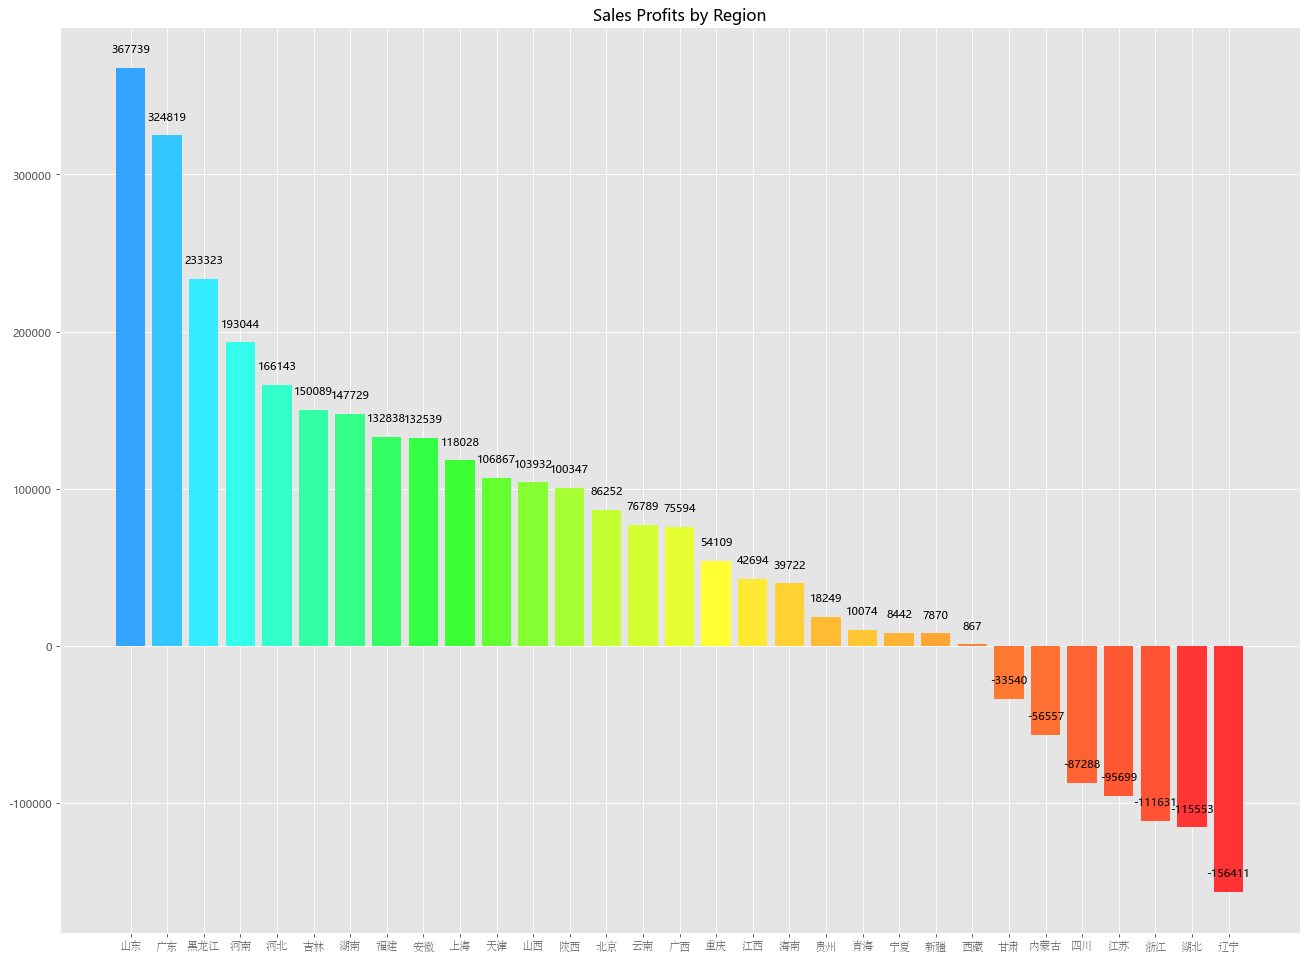

In [149]:
plt.figure(figsize = (20,15),dpi = 80)


rects1 = plt.bar(pros.index, pros, color = ['#33A5FF','#33C7FF','#33ECFF','#33FFEC','#33FFCA','#33FFA5','#33FF8A','#33FF64','#33FF46','#3CFF33','#64FF33','#86FF33','#A5FF33','#C4FF33','#D4FF33','#E6FF33','#FFFF33','#FFE933','#FFD133','#FFBB33','#FFC733','#FFB233','#FFA533','#FF8333','#FF7933','#FF7133','#FF6333','#FF5933',
                                           '#FF5333','#FF3633','#FF3333'])

for rect1 in rects1:
    plt.text(rect1.get_x()+rect1.get_width()/2, rect1.get_height()+10000, str(int(rect1.get_height())), ha = 'center')

plt.xticks(pros.index, fontproperties = my_font)
plt.title('Sales Profits by Region')

plt.show()

In [104]:
profits[-11:-1]

省/自治区
青海      10074.540
宁夏       8442.700
新疆       7870.940
西藏        867.160
甘肃     -33540.668
内蒙古    -56557.256
四川     -87288.852
江苏     -95699.436
浙江    -111631.044
湖北    -115553.228
Name: 利润, dtype: float64

Text(0.5, 1.0, 'Profits by Region (Top 20)')

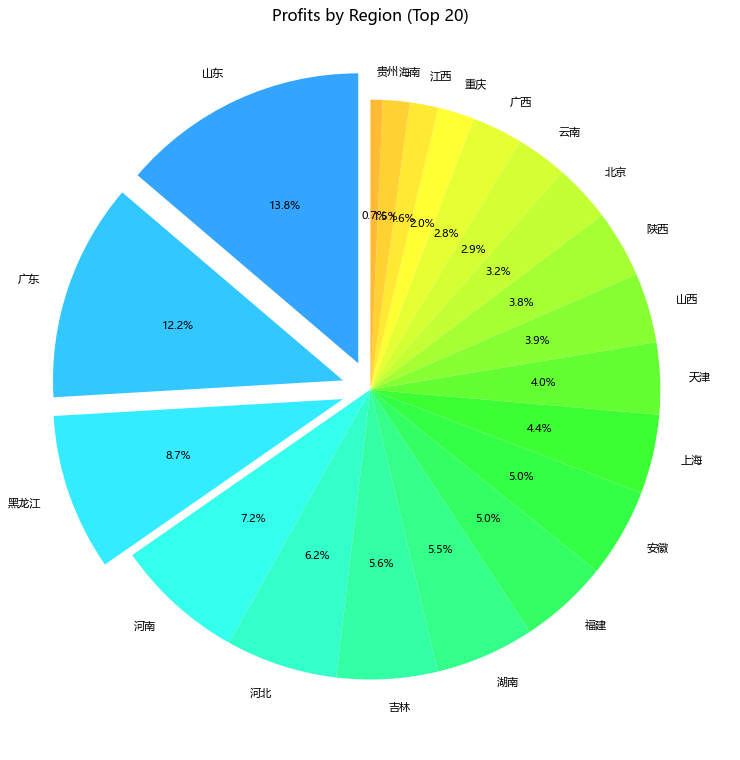

In [155]:
plt.figure(figsize=(12,12), dpi=80)

explode = [0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

patches, l_list1, p_list = plt.pie(profits[0:20], labels = profits[0:20].index, pctdistance = 0.6,explode = explode, autopct = '%.1f%%', startangle= 90, colors = colors)


plt.title('Profits by Region (Top 20)')


### 消费者类型利润占比

In [107]:
group_ctype = df.groupby('细分').size()
group_ctype

细分
公司      2879
小型企业    1654
消费者     4735
dtype: int64

Text(0.5, 1.0, 'Clients Category Percentage')

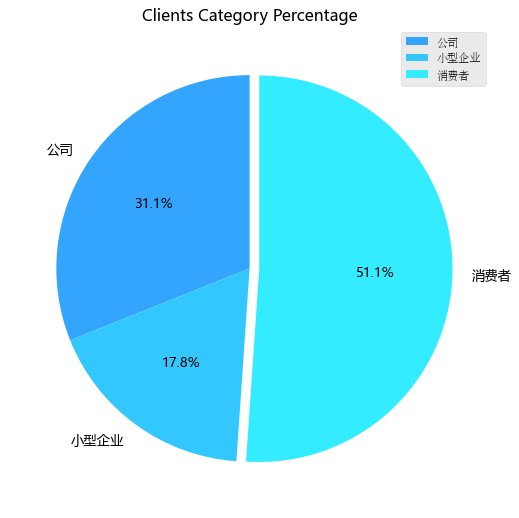

In [154]:
plt.figure(figsize=(10,8), dpi=80)

explode = [0,0,0.05]

patches, l_list1, p_list = plt.pie(group_ctype, labels = group_ctype.index, explode = explode, autopct = '%.1f%%', startangle= 90, colors = colors,textprops = {'fontsize':12, 'color':'k'})
    
plt.legend(prop = my_font)
    
plt.title('Clients Category Percentage')

### 产品子类别占比

In [109]:
group_prd = df.groupby('子类别').sum()['数量']
p_pct = group_prd.sort_values(ascending = False)
p_pct

子类别
装订机    9609
椅子     9430
收纳具    8755
书架     6825
信封     6644
用具     6609
用品     6604
系固件    6433
电话     6416
复印机    6176
配件     6121
纸张     6083
标签     6082
器具     6066
美术     5982
设备     3398
桌子     1853
Name: 数量, dtype: int64

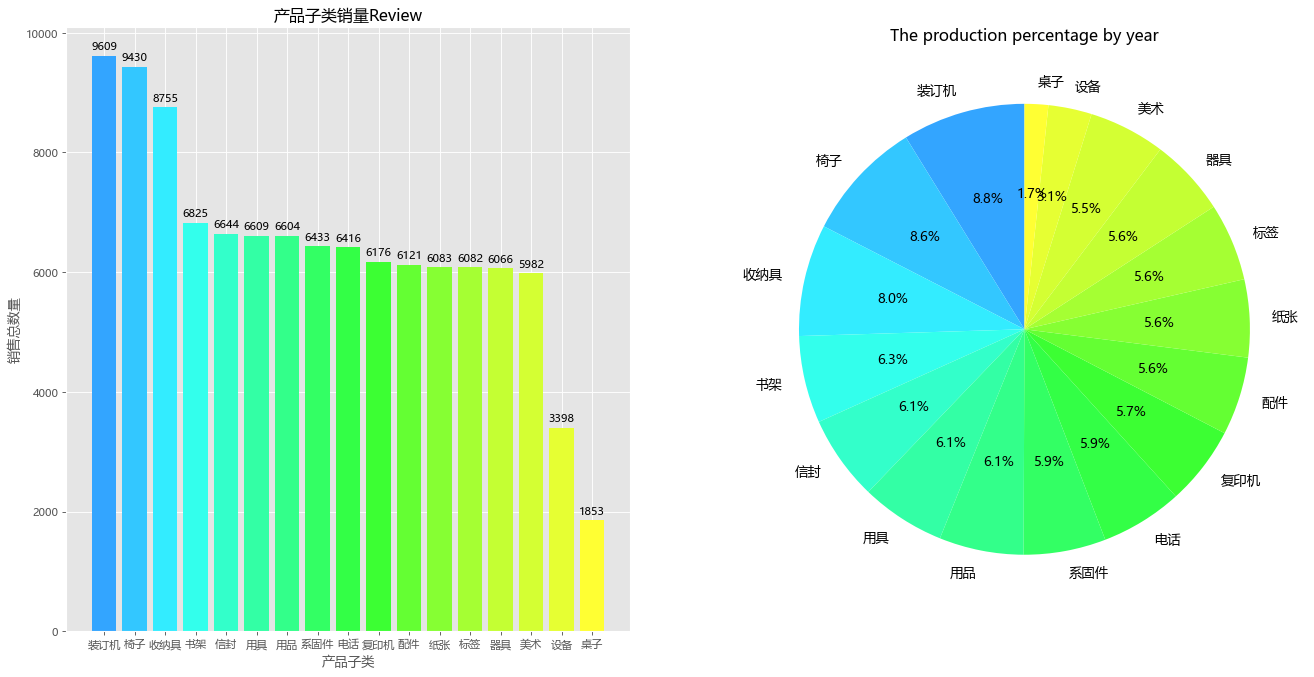

In [156]:
plt.figure(figsize = (20,10), dpi = 80)

colors = ['#33A5FF','#33C7FF','#33ECFF','#33FFEC','#33FFCA','#33FFA5','#33FF8A','#33FF64','#33FF46','#3CFF33','#64FF33','#86FF33','#A5FF33','#C4FF33','#D4FF33','#E6FF33','#FFFF33','#FFE933','#FFD133','#FFBB33','#FFC733']

plt.subplot(1,2,1)

rects2 = plt.bar(p_pct.index, p_pct.values,color = colors)
for rect2 in rects2:
    plt.text(rect2.get_x()+rect2.get_width()/2, rect2.get_height()+100, str(int(rect2.get_height())), ha = 'center')
    
plt.xticks(p_pct.index)

plt.title('产品子类销量Review')
plt.xlabel('产品子类')
plt.ylabel('销售总数量')

plt.subplot(1,2,2)

plt.pie(p_pct, labels = p_pct.index, autopct = '%.1f%%',startangle = 90,colors = colors,textprops = {'fontsize':12, 'color':'k'})
plt.title('The production percentage by year')

plt.show()